In [1]:
import pandas as pd
import numpy as np

In [2]:
dataFrame = pd.read_csv('auto-mpg.csv')
dataFrame

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [3]:
features = dataFrame.drop(["mpg", "car"], axis=1)
label = dataFrame["mpg"]

In [4]:
features.describe()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    float64
 4   acceleration  392 non-null    float64
 5   year          392 non-null    int64  
 6   origin        392 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.6 KB


In [6]:
# Mean Squared Error
def costFunction(y, predictions):
    m = len(y)
    squared_error = (y - predictions) ** 2
    return 1/(2*m) * np.sum(squared_error)

In [46]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions - y))
        
        descent = alpha * error
        
        print(error.shape)
        print(descent.shape)
        
        theta -= descent
        J_history.append(computeCost(X,y,theta))
    
    return weights, J_history

In [8]:
features = features.values
features

array([[  8. , 307. , 130. , ...,  12. ,  70. ,   1. ],
       [  8. , 350. , 165. , ...,  11.5,  70. ,   1. ],
       [  8. , 318. , 150. , ...,  11. ,  70. ,   1. ],
       ...,
       [  4. , 135. ,  84. , ...,  11.6,  82. ,   1. ],
       [  4. , 120. ,  79. , ...,  18.6,  82. ,   1. ],
       [  4. , 119. ,  82. , ...,  19.4,  82. ,   1. ]])

In [9]:
m = len(features[:,-1])
y = label.values.reshape(m, 1)

In [82]:
weights = np.random.normal(scale=1 / features.shape[1]**.5, size=features.shape[1])
weights.reshape(7, 1)

array([[ 0.12856459],
       [-0.05036745],
       [-0.56166648],
       [ 0.26838697],
       [-0.56772307],
       [-0.10262657],
       [ 0.42218264]])

In [68]:
features = np.append(np.ones((m,1)),features,axis=1)
features

array([[  1. ,   8. , 307. , ...,  12. ,  70. ,   1. ],
       [  1. ,   8. , 350. , ...,  11.5,  70. ,   1. ],
       [  1. ,   8. , 318. , ...,  11. ,  70. ,   1. ],
       ...,
       [  1. ,   4. , 135. , ...,  11.6,  82. ,   1. ],
       [  1. ,   4. , 120. , ...,  18.6,  82. ,   1. ],
       [  1. ,   4. , 119. , ...,  19.4,  82. ,   1. ]])

In [47]:
weights, J_history2 = gradientDescent(features, y, weights, 0.1, 400)

(7, 392)
(7, 392)


ValueError: operands could not be broadcast together with shapes (7,) (7,392) (7,) 

In [ ]:
def bias_coef_update(m, b, X, Y, learning_rate):
    m_gradient = 0
    b_gradient = 0
    
    N = len(Y)
    
    # iterate over examples
    for idx in range(len(Y)):
        x = X[idx]
        y = Y[idx]
                      
        # predict y with current bias and coefficient
        y_hat = (m * x) + b
        m_gradient += -(2/N) * x * (y - y_hat)
        b_gradient += -(2/N) * (y - y_hat)
        
    # use gradient with learning_rate to nudge bias and coefficient
    new_coef = m - (m_gradient * learning_rate)
    new_bias = b - (b_gradient * learning_rate)
    
    return new_coef, new_bias

Text(0.5, 1.0, 'Cost function using Gradient Descent')

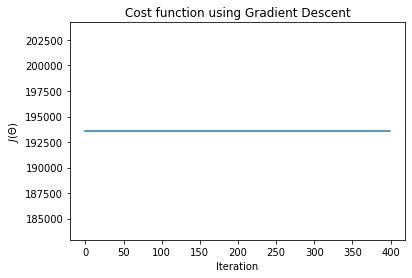

In [38]:
import matplotlib.pyplot as plt

plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [39]:
J_history2

[193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364308536,
 193574.68364

In [79]:
# Gradient descent step
def update_weights(x, y, weights, learnrate):
    output = x.dot(weights)
#     d_error = -(y - output)
    d_error = (output - y)
#     print(x.shape)
#     print(d_error.shape)
#     print(weights.shape)
    weights += learnrate * d_error * x
    
#     bias -= learnrate * d_error
    return weights

In [80]:
def train(features, label, epochs, weights):
    learnrate = 0.01
    
    error = []
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        predictions = []
        for x, y in zip(features, label):
            output = x.dot(weights)
            print(output)
            weights = update_weights(x, y, weights, learnrate)
            predictions.append(output)
            
            
        error = costFunction(y, predictions)
        print(error)
        
    return error

In [83]:
error = train(features, y, 1, weights)

839.402671620501
107393312.73255558
13778970902215.61
1.6424749473781253e+18
1.964139941818529e+23
2.9726438979240927e+28
5.690887553667131e+33
1.082785171996089e+39
2.0934923271847894e+44
3.613699991691862e+49
5.0246195005945736e+54
6.542774687747481e+59
8.988852717968594e+64
1.0631420374778579e+70
7.865064166344413e+74
5.314073274740737e+79
4.204831784550831e+84
3.0399509595734506e+89
1.6848718998802375e+94
6.61701833446122e+98
3.257701231671623e+103
2.1233125635950428e+108
1.230714321445294e+113
6.565001739175458e+117
3.9095327497156596e+122
4.815310247233352e+127
9.801096810082167e+132
1.8936234247373227e+138
3.953535132588633e+143
4.00530676086238e+148
1.9422578171705776e+153
9.854894527350745e+157
5.82388439410341e+162
5.315130729303151e+167
6.1233474527965855e+172
6.777979485797758e+177
7.407785136685398e+182
1.0328153417630549e+188
1.9585485029166487e+193
3.665616491131814e+198
6.288266867870443e+203
1.2859411710270668e+209
3.0483968230841076e+214
7.495870073381828e+219
1.15079

/home/abdulrehman/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


In [100]:
# #third try

def compute_cost(features, label, weights):
    num_of_samples = len(features)
    cost_sum = 0.0
    for x, y in zip(features, label):
        y_hat = np.dot(weights, x)
        cost_sum += (y_hat - y) ** 2
        
    cost = cost_sum / (num_of_samples)*2
    
    return cost
        


In [109]:
def gradient_descent(features, label, weights, max_iter, alpha=0.01):
    """Compute the params for linear regression using batch gradient descent""" 
    iteration = 0
    num_samples = len(features)
    cost = np.zeros(max_iter)
    weights_store = np.zeros([7, max_iter])
    
    while iteration < max_iter:
        cost[iteration] = compute_cost(features, label, weights)
        weights_store[:, iteration] = weights
        
        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        
        for x,y in zip(features, label):
            y_hat = np.dot(weights, x)
            gradient = np.array(x) * (y - y_hat)
            weights = alpha * gradient/num_samples
            
        iteration += 1
    
    return weights, cost, weights_store

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.20)

# params_0 = np.array([20.0, 80.0])

weights = np.random.normal(scale=1 / 7**.5, size=7)

alpha_batch = 1e-3
max_iter = 500
params_hat_batch, cost_batch, params_store_batch =\
    gradient_descent(x_train, y_train, weights, max_iter)

--------------------------
iteration: 0
cost: 1390647.5177014023
--------------------------
iteration: 1
cost: inf
--------------------------
iteration: 2
cost: inf
--------------------------
iteration: 3
cost: inf
--------------------------
iteration: 4
cost: inf
--------------------------
iteration: 5
cost: inf
--------------------------
iteration: 6
cost: inf
--------------------------
iteration: 7
cost: inf
--------------------------
iteration: 8
cost: inf
--------------------------
iteration: 9
cost: inf
--------------------------
iteration: 10
cost: inf
--------------------------
iteration: 11
cost: inf
--------------------------
iteration: 12
cost: inf
--------------------------
iteration: 13
cost: inf
--------------------------
iteration: 14
cost: inf
--------------------------
iteration: 15
cost: inf
--------------------------
iteration: 16
cost: inf
--------------------------
iteration: 17
cost: inf
--------------------------
iteration: 18
cost: inf
--------------------------

/home/abdulrehman/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in multiply


--------------------------
iteration: 31
cost: inf
--------------------------
iteration: 32
cost: inf
--------------------------
iteration: 33
cost: inf
--------------------------
iteration: 34
cost: inf
--------------------------
iteration: 35
cost: inf
--------------------------
iteration: 36
cost: inf
--------------------------
iteration: 37
cost: inf
--------------------------
iteration: 38
cost: inf
--------------------------
iteration: 39
cost: inf
--------------------------
iteration: 40
cost: inf
--------------------------
iteration: 41
cost: inf
--------------------------
iteration: 42
cost: inf
--------------------------
iteration: 43
cost: inf
--------------------------
iteration: 44
cost: inf
--------------------------
iteration: 45
cost: inf
--------------------------
iteration: 46
cost: inf
--------------------------
iteration: 47
cost: inf
--------------------------
iteration: 48
cost: inf
--------------------------
iteration: 49
cost: inf
--------------------------
iter

--------------------------
iteration: 218
cost: inf
--------------------------
iteration: 219
cost: inf
--------------------------
iteration: 220
cost: inf
--------------------------
iteration: 221
cost: inf
--------------------------
iteration: 222
cost: inf
--------------------------
iteration: 223
cost: inf
--------------------------
iteration: 224
cost: inf
--------------------------
iteration: 225
cost: inf
--------------------------
iteration: 226
cost: inf
--------------------------
iteration: 227
cost: inf
--------------------------
iteration: 228
cost: inf
--------------------------
iteration: 229
cost: inf
--------------------------
iteration: 230
cost: inf
--------------------------
iteration: 231
cost: inf
--------------------------
iteration: 232
cost: inf
--------------------------
iteration: 233
cost: inf
--------------------------
iteration: 234
cost: inf
--------------------------
iteration: 235
cost: inf
--------------------------
iteration: 236
cost: inf
------------

--------------------------
iteration: 390
cost: inf
--------------------------
iteration: 391
cost: inf
--------------------------
iteration: 392
cost: inf
--------------------------
iteration: 393
cost: inf
--------------------------
iteration: 394
cost: inf
--------------------------
iteration: 395
cost: inf
--------------------------
iteration: 396
cost: inf
--------------------------
iteration: 397
cost: inf
--------------------------
iteration: 398
cost: inf
--------------------------
iteration: 399
cost: inf
--------------------------
iteration: 400
cost: inf
--------------------------
iteration: 401
cost: inf
--------------------------
iteration: 402
cost: inf
--------------------------
iteration: 403
cost: inf
--------------------------
iteration: 404
cost: inf
--------------------------
iteration: 405
cost: inf
--------------------------
iteration: 406
cost: inf
--------------------------
iteration: 407
cost: inf
--------------------------
iteration: 408
cost: inf
------------